In [1]:
!pip install transformers pandas torch scikit-learn

In [2]:
import pandas as pd

# Load the first CSV file
file_path1 = '/kaggle/input/sql-injection-dataset3-0-csv/SQL_Injection_Dataset_ChatGPT.csv'  # Replace with your actual file path
df1 = pd.read_csv(file_path1)

# Load the second CSV file
file_path2 = '/kaggle/input/sql-injection-dataset3-0-csv/SQL_Injection_Dataset_ChatGPT_Claude.csv'  # Replace with your actual file path
df2 = pd.read_csv(file_path2)

# Ensure both DataFrames have the same columns (['SQL Query', 'Injection Type', 'Vulnerability Status'])
df1 = df1[['SQL Query', 'Injection Type', 'Vulnerability Status']]
df2 = df2[['SQL Query', 'Injection Type', 'Vulnerability Status']]

# Concatenate the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_CSV.csv', index=False)

print("Combined CSV file created successfully!")

Combined CSV file created successfully!


In [3]:
import pandas as pd

# Load the first CSV file
file_path1 = '/kaggle/input/sql-injection-dataset3-0-csv/SQL_Injection_Dataset_ChatGPT.csv'  # Replace with your actual file path
df1 = pd.read_csv(file_path1)

# Load the second CSV file
file_path2 = '/kaggle/input/sql-injection-dataset3-0-csv/SQL_Injection_Dataset_ChatGPT_Claude.csv'  # Replace with your actual file path
df2 = pd.read_csv(file_path2)

# Ensure both DataFrames have the same columns (['SQL Query', 'Injection Type', 'Vulnerability Status'])
df1 = df1[['SQL Query', 'Injection Type', 'Vulnerability Status']]
df2 = df2[['SQL Query', 'Injection Type', 'Vulnerability Status']]

# Concatenate the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_CSV.csv', index=False)

print("Combined CSV file created successfully!")

Combined CSV file created successfully!


In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/working/combined_CSV.csv')

# Display the first few rows to understand the data
print(data.head())

# Get the unique injection types and their counts
injection_type_counts = data['Injection Type'].value_counts()

# Display the results
print("Injection Types and Counts:")
print(injection_type_counts)

# Get the total number of unique injection types
num_injection_types = injection_type_counts.shape[0]
print(f"\nTotal Number of Unique Injection Types: {num_injection_types}")


                                           SQL Query Injection Type  \
0   SELECT * FROM users WHERE id = '' OR '1'='1';--'    Union-based   
1  SELECT email FROM customers WHERE email = '' U...    Error-based   
2  SELECT * FROM users WHERE id = ''; DROP TABLE ...    Union-based   
3  UPDATE accounts SET balance=500 WHERE id='; DR...     Time-based   
4  SELECT email FROM customers WHERE email = '100...    Union-based   

  Vulnerability Status  
0                  Yes  
1                  Yes  
2                  Yes  
3                  Yes  
4                  Yes  
Injection Types and Counts:
Injection Type
None-based         1019
Error-based         737
Boolean-based       560
Union-based         537
Stacked Queries     536
Time-based          535
Metadata-based      529
Name: count, dtype: int64

Total Number of Unique Injection Types: 7


In [5]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/working/combined_CSV.csv"
data = pd.read_csv(file_path)

# 1. Get the number of attributes (columns)
num_attributes = data.shape[1]
print(f"Number of attributes: {num_attributes}")

# 2. Show the columns to identify SQL Query, Injection Type, and Vulnerability Status
print("Columns in the dataset:")
print(data.columns)

# 3. Count occurrences of each Injection Type
injection_type_counts = data['Injection Type'].value_counts()
print("\nCount of each Injection Type:")
print(injection_type_counts)

# 4. Count occurrences of each Vulnerability Status
vulnerability_status_counts = data['Vulnerability Status'].value_counts()
print("\nCount of each Vulnerability Status:")
print(vulnerability_status_counts)

# 5. Group by Injection Type and Vulnerability Status together
grouped_counts = data.groupby(['Injection Type', 'Vulnerability Status']).size().reset_index(name='Counts')
print("\nCount of each Injection Type and Vulnerability Status combination:")
print(grouped_counts)

Number of attributes: 3
Columns in the dataset:
Index(['SQL Query', 'Injection Type', 'Vulnerability Status'], dtype='object')

Count of each Injection Type:
Injection Type
None-based         1019
Error-based         737
Boolean-based       560
Union-based         537
Stacked Queries     536
Time-based          535
Metadata-based      529
Name: count, dtype: int64

Count of each Vulnerability Status:
Vulnerability Status
Yes    3434
No     1020
Name: count, dtype: int64

Count of each Injection Type and Vulnerability Status combination:
    Injection Type Vulnerability Status  Counts
0    Boolean-based                  Yes     560
1      Error-based                  Yes     737
2   Metadata-based                  Yes     529
3       None-based                   No    1019
4  Stacked Queries                  Yes     536
5       Time-based                  Yes     535
6      Union-based                  Yes     537


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
import matplotlib.pyplot as plt
import seaborn as sns

# Define your Hugging Face token
huggingface_token = "your_hugging_face_token_here"  # Replace with your actual token

# Load and shuffle the dataset
data = pd.read_csv('/kaggle/working/combined_CSV.csv')
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle the data
print(data.head())
print("Column names:", data.columns.tolist())

# Filter and balance data per injection type and vulnerability status
type_counts = data['Injection Type'].value_counts()
balanced_data = pd.DataFrame()

for injection_type in type_counts.index:
    type_data = data[data['Injection Type'] == injection_type]
    vulnerability_samples = type_data[type_data['Vulnerability Status'] == 'Yes']
    none_samples = type_data[type_data['Vulnerability Status'] == 'No']

    min_samples = 50
    if len(vulnerability_samples) >= min_samples:
        balanced_data = pd.concat([balanced_data, vulnerability_samples.sample(n=min_samples, random_state=42)])
    if len(none_samples) >= min_samples:
        balanced_data = pd.concat([balanced_data, none_samples.sample(n=min_samples, random_state=42)])

                                           SQL Query Injection Type  \
0  SELECT email FROM customers WHERE email = 'apple'     None-based   
1  SELECT * FROM employees WHERE emp_id='' OR '1'...  Boolean-based   
2  SELECT * FROM orders WHERE total > 1000; DBMS_...     Time-based   
3  DELETE FROM customers WHERE email='' OR '10'='...  Boolean-based   
4  SELECT * FROM users WHERE username = 'test' AN...     Time-based   

  Vulnerability Status  
0                   No  
1                  Yes  
2                  Yes  
3                  Yes  
4                  Yes  
Column names: ['SQL Query', 'Injection Type', 'Vulnerability Status']


In [7]:
from sklearn.utils import resample

# Filter out 'None-based - No'
balanced_data['class'] = balanced_data['Injection Type'] + ' - ' + balanced_data['Vulnerability Status']
filtered_data = balanced_data[balanced_data['class'] != 'None-based - No']

# Initialize storage for splits
train_data, valid_data, test_data = [], [], []

# Define sampling counts
train_count = 350
valid_count = 50
test_count = 100
required_per_class = train_count + valid_count + test_count

# Group by class and sample
for cls, group in filtered_data.groupby('class'):
    if len(group) >= required_per_class:
        # Shuffle the group and split into required counts
        group = group.sample(frac=1, random_state=42).reset_index(drop=True)
    else:
        # Oversample to meet the required size
        group = resample(group, replace=True, n_samples=required_per_class, random_state=42)
    
    # Assign splits
    train_data.append(group.iloc[:train_count])
    valid_data.append(group.iloc[train_count:train_count + valid_count])
    test_data.append(group.iloc[train_count + valid_count:])

# Concatenate all splits
train_data = pd.concat(train_data).reset_index(drop=True)
valid_data = pd.concat(valid_data).reset_index(drop=True)
test_data = pd.concat(test_data).reset_index(drop=True)

# Print the final sizes to validate
print(f"Training set size: {len(train_data)} (Expected: 2100)")
print(f"Validation set size: {len(valid_data)} (Expected: 300)")
print(f"Testing set size: {len(test_data)} (Expected: 600)")

# Print class distribution in each split
print("Training set class distribution:")
print(train_data['class'].value_counts())
print("\nValidation set class distribution:")
print(valid_data['class'].value_counts())
print("\nTesting set class distribution:")
print(test_data['class'].value_counts())

Training set size: 2100 (Expected: 2100)
Validation set size: 300 (Expected: 300)
Testing set size: 600 (Expected: 600)
Training set class distribution:
class
Boolean-based - Yes      350
Error-based - Yes        350
Metadata-based - Yes     350
Stacked Queries - Yes    350
Time-based - Yes         350
Union-based - Yes        350
Name: count, dtype: int64

Validation set class distribution:
class
Boolean-based - Yes      50
Error-based - Yes        50
Metadata-based - Yes     50
Stacked Queries - Yes    50
Time-based - Yes         50
Union-based - Yes        50
Name: count, dtype: int64

Testing set class distribution:
class
Boolean-based - Yes      100
Error-based - Yes        100
Metadata-based - Yes     100
Stacked Queries - Yes    100
Time-based - Yes         100
Union-based - Yes        100
Name: count, dtype: int64


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, average_precision_score

import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from transformers import Trainer, TrainingArguments
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Load and preprocess the dataset
data = pd.read_csv('/kaggle/working/combined_CSV.csv')
print(data.head())
print("Column names:", data.columns.tolist())
print("Unique Injection Types:", data['Injection Type'].unique())
type_counts = data['Injection Type'].value_counts()
print("Injection Type Counts:\n", type_counts)

# Limit data samples per injection type
balanced_data = pd.DataFrame()
for injection_type in type_counts.index:
    if type_counts[injection_type] >= 100:
        samples = data[data['Injection Type'] == injection_type].sample(n=100, random_state=42)
        balanced_data = pd.concat([balanced_data, samples])


                                           SQL Query Injection Type  \
0   SELECT * FROM users WHERE id = '' OR '1'='1';--'    Union-based   
1  SELECT email FROM customers WHERE email = '' U...    Error-based   
2  SELECT * FROM users WHERE id = ''; DROP TABLE ...    Union-based   
3  UPDATE accounts SET balance=500 WHERE id='; DR...     Time-based   
4  SELECT email FROM customers WHERE email = '100...    Union-based   

  Vulnerability Status  
0                  Yes  
1                  Yes  
2                  Yes  
3                  Yes  
4                  Yes  
Column names: ['SQL Query', 'Injection Type', 'Vulnerability Status']
Unique Injection Types: ['Union-based' 'Error-based' 'Time-based' 'Boolean-based' 'Metadata-based'
 'Stacked Queries' 'None-based' nan]
Injection Type Counts:
 Injection Type
None-based         1019
Error-based         737
Boolean-based       560
Union-based         537
Stacked Queries     536
Time-based          535
Metadata-based      529
Name: coun

Class Boolean-based - Yes has insufficient data. Oversampling.
Class Error-based - Yes has insufficient data. Oversampling.
Class Metadata-based - Yes has insufficient data. Oversampling.
Class None-based - No has insufficient data. Oversampling.
Class Stacked Queries - Yes has insufficient data. Oversampling.
Class Time-based - Yes has insufficient data. Oversampling.
Class Union-based - Yes has insufficient data. Oversampling.


tokenizer_config.json:   0%|          | 0.00/175 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/865k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/424k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/16.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at microsoft/codegpt-small-py and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://w

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,1.056000,0.527893,0.840000
2,0.289100,0.298480,0.888571
3,0.271100,0.224759,0.908571
4,0.246500,0.233935,0.908571
5,0.261100,0.252624,0.891429
6,0.195600,0.197216,0.911429
7,0.178900,0.234673,0.900000
8,0.236200,0.168013,0.914286
9,0.210400,0.178044,0.905714
10,0.174400,0.161154,0.920000


Test Loss: 0.18007922172546387, Test Accuracy: 0.92
AUC-ROC: 0.9945
Mean Average Precision (mAP): 0.9714
                       precision    recall  f1-score   support

  Boolean-based - Yes       0.80      0.88      0.84       100
    Error-based - Yes       0.92      0.86      0.89       100
 Metadata-based - Yes       1.00      1.00      1.00       100
      None-based - No       1.00      1.00      1.00       100
Stacked Queries - Yes       1.00      1.00      1.00       100
     Time-based - Yes       0.89      0.85      0.87       100
    Union-based - Yes       0.83      0.85      0.84       100

             accuracy                           0.92       700
            macro avg       0.92      0.92      0.92       700
         weighted avg       0.92      0.92      0.92       700



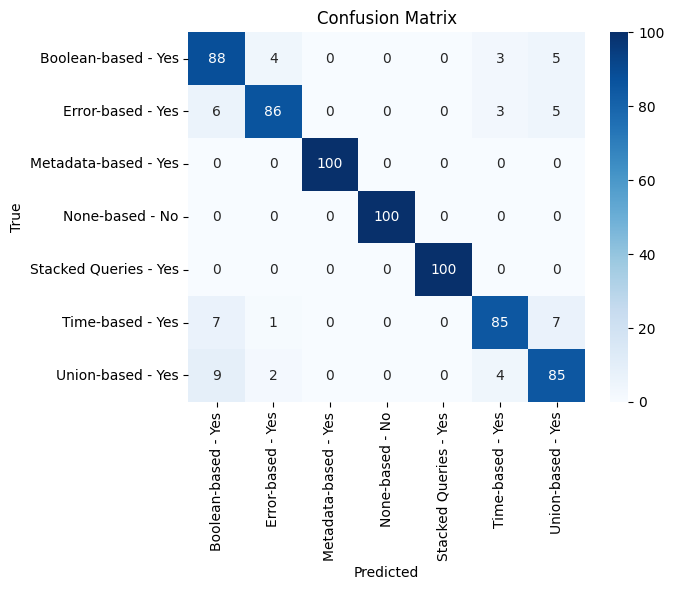

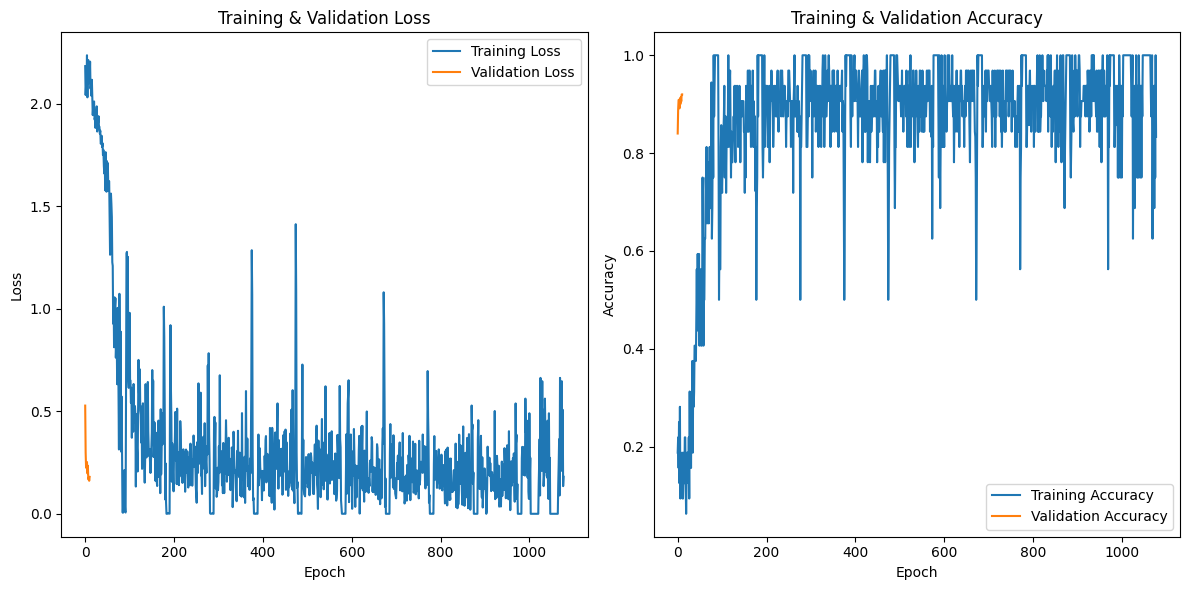

In [9]:
# Check if balanced data was populated correctly
if balanced_data.empty:
    print("No sufficient data available to train the model.")
else:
    # Combine class labels
    balanced_data['class'] = balanced_data['Injection Type'] + ' - ' + balanced_data['Vulnerability Status']
    classes_to_include = balanced_data['class'].value_counts().index  # Include all classes
    balanced_data = balanced_data[balanced_data['class'].isin(classes_to_include)]
    balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle data

    # Stratify splits per class
    train_data, valid_data, test_data = [], [], []

    for cls, group in balanced_data.groupby('class'):
        if len(group) >= 500:
            group = group.sample(frac=1, random_state=42).reset_index(drop=True)
        else:
            print(f"Class {cls} has insufficient data. Oversampling.")
            group = group.sample(n=500, replace=True, random_state=42)

        train_data.append(group.iloc[:350])
        valid_data.append(group.iloc[350:400])
        test_data.append(group.iloc[400:500])

    # Combine splits into final datasets
    train_data = pd.concat(train_data).reset_index(drop=True)
    valid_data = pd.concat(valid_data).reset_index(drop=True)
    test_data = pd.concat(test_data).reset_index(drop=True)

    # Map class labels to integers
    label_mapping = {label: idx for idx, label in enumerate(sorted(balanced_data['class'].unique()))}
    train_data['label'] = train_data['class'].map(label_mapping)
    valid_data['label'] = valid_data['class'].map(label_mapping)
    test_data['label'] = test_data['class'].map(label_mapping)

    # Extract inputs and labels
    X_train, y_train = train_data['SQL Query'], train_data['label']
    X_valid, y_valid = valid_data['SQL Query'], valid_data['label']
    X_test, y_test = test_data['SQL Query'], test_data['label']

    # Initialize CodeGPT tokenizer and model
    model_name = "microsoft/codegpt-small-py"
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    tokenizer.pad_token = tokenizer.eos_token  # CodeGPT doesn't have a pad token, set it to eos_token
    model = GPT2ForSequenceClassification.from_pretrained(model_name, num_labels=len(label_mapping))

    # Tokenization
    train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")
    valid_encodings = tokenizer(X_valid.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")
    test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")

    # Create dataset objects for PyTorch
    class InjectionDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: val[idx] for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

        def __len__(self):
            return len(self.labels)

    train_dataset = InjectionDataset(train_encodings, y_train.tolist())
    valid_dataset = InjectionDataset(valid_encodings, y_valid.tolist())
    test_dataset = InjectionDataset(test_encodings, y_test.tolist())

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=10,
        per_device_train_batch_size=32,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True
    )

    # Custom Trainer to track training and validation accuracy/loss
    class CustomTrainer(Trainer):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.train_losses = []
            self.eval_losses = []
            self.train_accuracies = []
            self.eval_accuracies = []

        def compute_loss(self, model, inputs, return_outputs=False):
            outputs = model(**inputs)
            loss = outputs.loss
            logits = outputs.logits
            labels = inputs['labels']
            preds = torch.argmax(logits, dim=-1)
            acc = (preds == labels).float().mean()
            self.train_accuracies.append(acc.item())
            self.train_losses.append(loss.item())
            return (loss, outputs) if return_outputs else loss

        def evaluate(self, eval_dataset=None, ignore_keys=None, metric_key_prefix="eval"):
            metrics = super().evaluate(eval_dataset=eval_dataset, ignore_keys=ignore_keys, metric_key_prefix=metric_key_prefix)
            self.eval_losses.append(metrics["eval_loss"])
            self.eval_accuracies.append(metrics["eval_accuracy"])
            return metrics

    # Create trainer with custom class
    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=valid_dataset,
        compute_metrics=lambda p: {
            "accuracy": accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1))
        }
    )

    # Train the model
    trainer.train()

    # Evaluate the model on test dataset
    results = trainer.evaluate(test_dataset)
    predictions = trainer.predict(test_dataset).predictions
    predicted_labels = np.argmax(predictions, axis=1)
    test_loss = results["eval_loss"]
    test_accuracy = results["eval_accuracy"]
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

    # Binarize the test labels for multi-class evaluation (one-vs-rest)
    probs = torch.nn.functional.softmax(torch.tensor(predictions), dim=1).numpy()
    y_test_bin = label_binarize(y_test.tolist(), classes=np.arange(len(label_mapping)))

    auc_roc = roc_auc_score(y_test_bin, probs, multi_class="ovr")
    mAP = average_precision_score(y_test_bin, probs, average="macro")

    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Mean Average Precision (mAP): {mAP:.4f}")

    # Classification report and confusion matrix
    print(classification_report(y_test, predicted_labels, target_names=label_mapping.keys()))
    
    cm = confusion_matrix(y_test, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Plotting training and validation metrics
    plt.figure(figsize=(12, 6))

    # Training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(trainer.train_losses, label="Training Loss")
    plt.plot(trainer.eval_losses, label="Validation Loss")
    plt.title("Training & Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(trainer.train_accuracies, label="Training Accuracy")
    plt.plot(trainer.eval_accuracies, label="Validation Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()